In [35]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#plotting
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# Exercise
### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [37]:
df_store = acquire.get_store_data()


Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


In [38]:
#testing prepare function

#note that function takes a minute to run from import

df = prepare.prep_store_data(df_store)

In [5]:
#checking
df.isnull().sum()

quantity         0
sale_id          0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
month            0
day_of_week      0
sales_total      0
dtype: int64

In [6]:
df.head(1)

,quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [39]:
df = df.groupby(['sale_date']).sales_total.sum().reset_index()
df

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85
...,...,...
1821,2017-12-27 00:00:00+00:00,109151.15
1822,2017-12-28 00:00:00+00:00,117377.49
1823,2017-12-29 00:00:00+00:00,126541.84
1824,2017-12-30 00:00:00+00:00,134903.07


In [40]:
#Choo - Choo
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

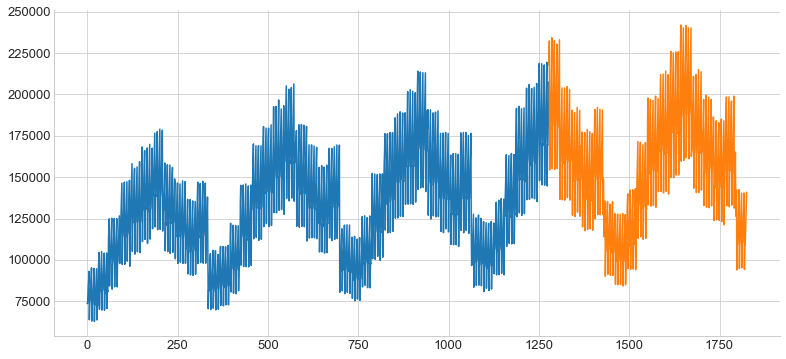

In [41]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [42]:
train = train.set_index('sale_date')

In [43]:
#set this variable to explore
sales_total = train.sales_total
sales_total.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

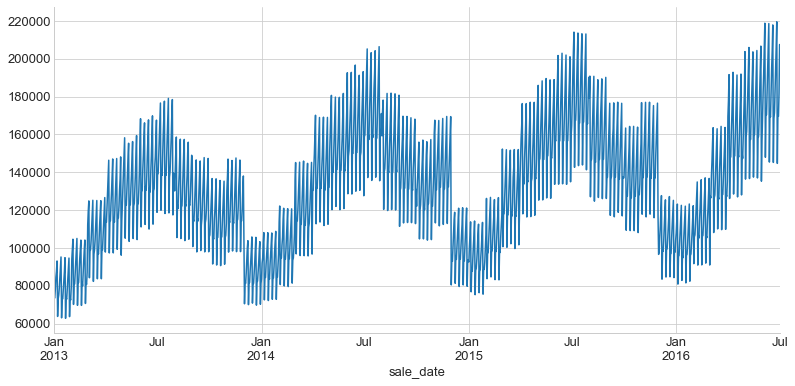

In [44]:
sales_total.plot()

<AxesSubplot:>

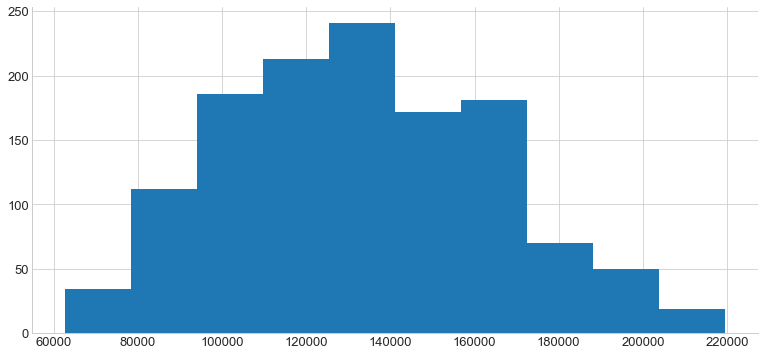

In [13]:
sales_total.hist()

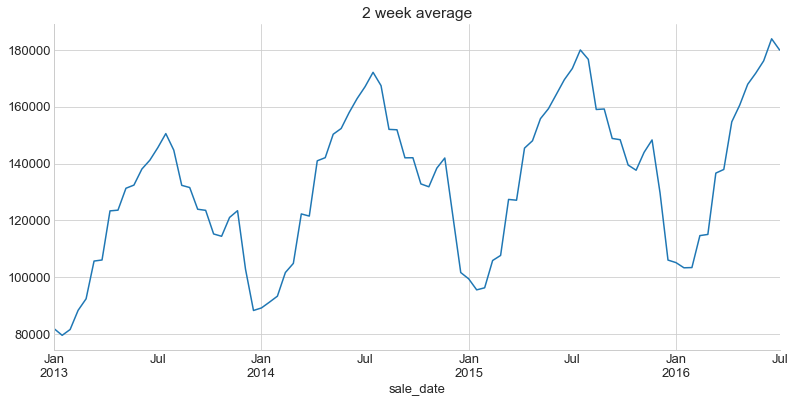

In [14]:
sales_total.resample('2W').mean().plot(title='2 week average');

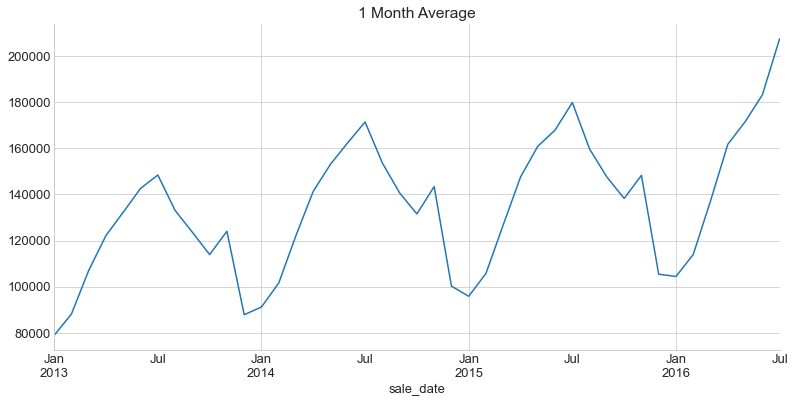

In [15]:
sales_total.resample('1M').mean().plot(title='1 Month Average');

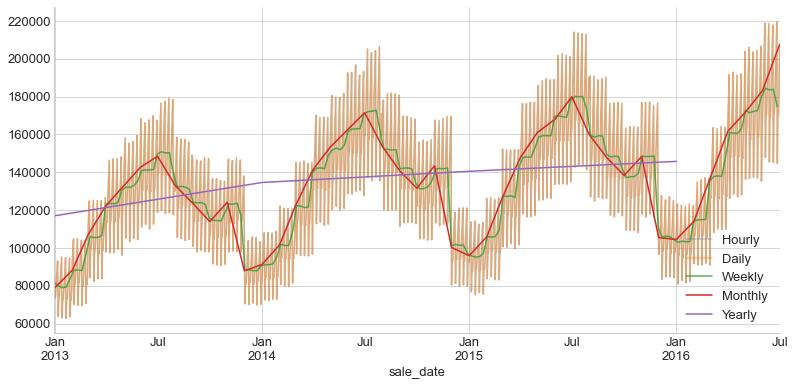

In [16]:
# This doesn't give us anything
ax = sales_total.plot(alpha=.3, label='Hourly')
sales_total.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
sales_total.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
sales_total.resample('M').mean().plot(ax=ax, label='Monthly')
sales_total.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

In [17]:
sales_total.groupby(sales_total.index.month).mean()

sale_date
1      92616.404919
2     102500.861416
3     123347.179677
4     143231.956750
5     154466.339355
6     164049.207583
7     167006.675957
8     148827.419570
9     137279.423333
10    127928.998387
11    138585.456111
12     97863.146129
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

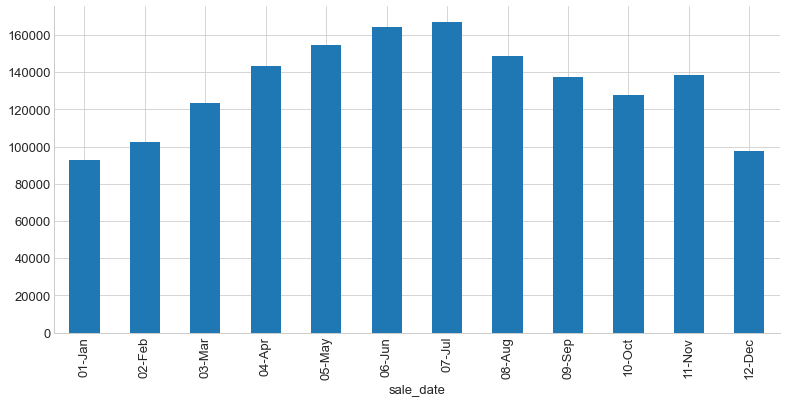

In [18]:
# looking at sales by month
# strftime('%m-%b') is just to have the labels on the bars
sales_total.groupby(sales_total.index.strftime('%m-%b')).mean().plot.bar()


From our data we notice that sales peak in July of the average time frame by year - my notion would be that November and Decemeber would be higher due to the holidays - interesting find in this dataset

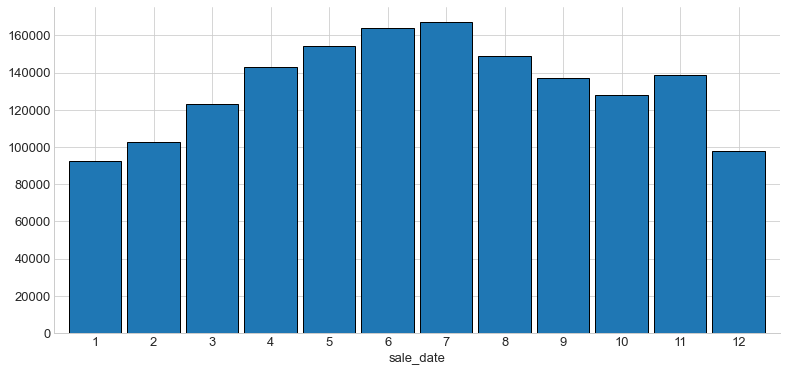

In [19]:
sales_total.groupby(sales_total.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='sales_total');

In [25]:
df.head(1)

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01


In [46]:
#add month to train
train['month'] = train.index.month

<AxesSubplot:xlabel='month'>

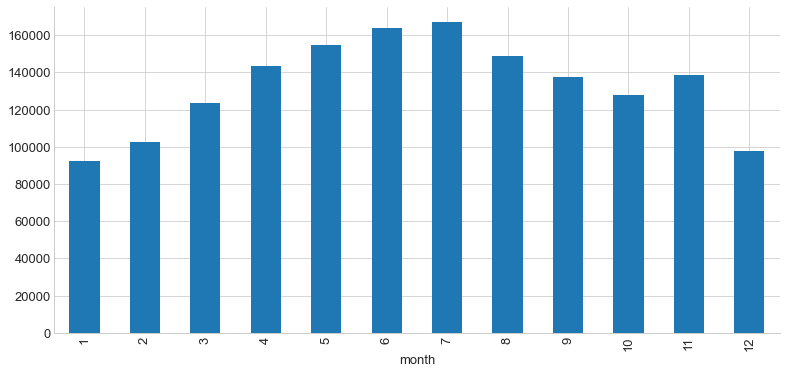

In [49]:
train.groupby('month').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

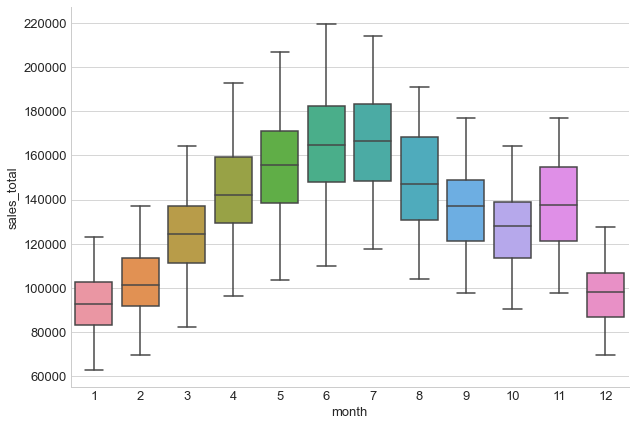

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='month',y='sales_total')

In [50]:
#and weekday
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='weekday'>

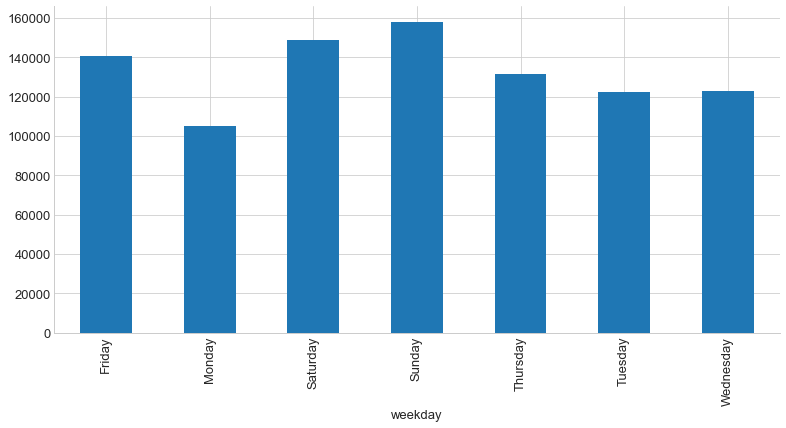

In [53]:
train.groupby('weekday').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

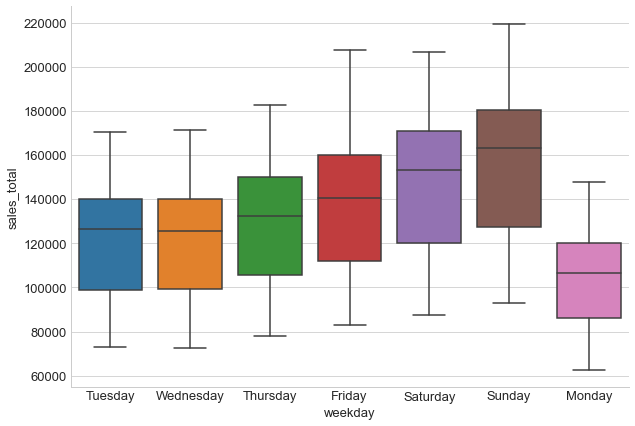

In [51]:
# makes sense that people would typically shop more on the weekends than on Monday
# values still very similar in this graph
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='weekday',y='sales_total')

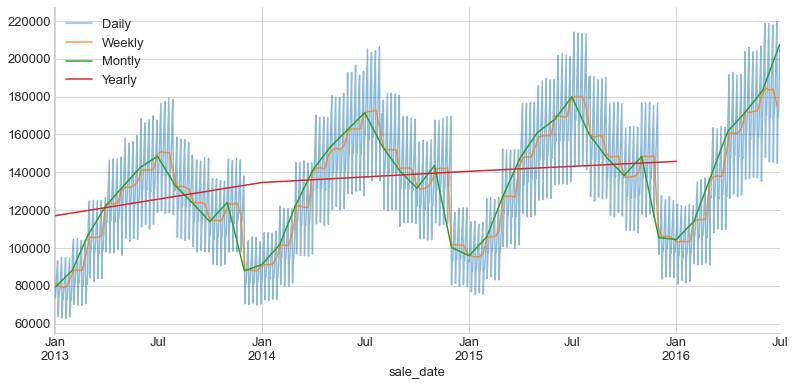

In [61]:
#this is really cool
#plt.figure(figsize=(7,10))
sales_total.resample('D').mean().plot(alpha=.5, label='Daily')
sales_total.resample('W').mean().plot(alpha=.8, label='Weekly')
sales_total.resample('M').mean().plot(label='Montly')
sales_total.resample('Y').mean().plot(label='Yearly')
plt.legend()

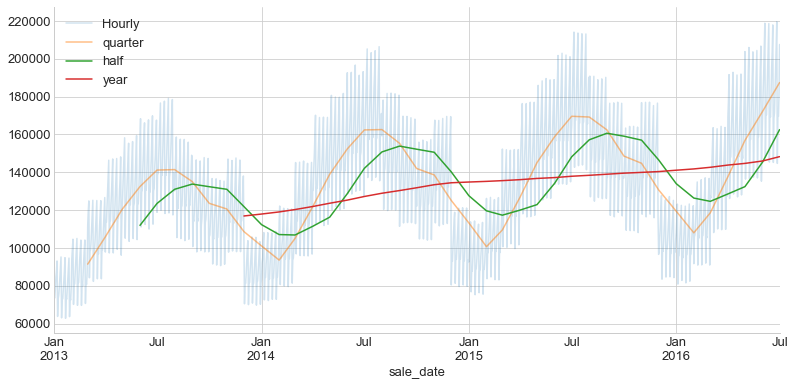

In [62]:
sales_total.plot(alpha=.2, label='Hourly')
sales_total.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='quarter')
sales_total.resample('M').mean().rolling(6).mean().plot(alpha=8, label='half')
sales_total.resample('M').mean().rolling(12).mean().plot(alpha=8, label='year')

plt.legend()

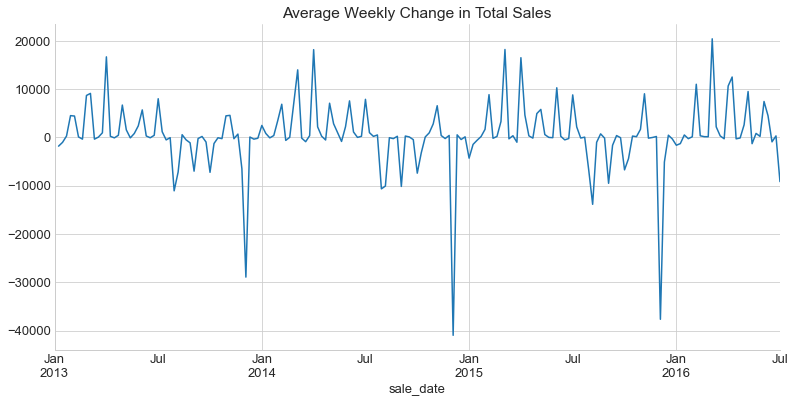

In [64]:
sales_total.resample('W').mean().diff().plot(title='Average Weekly Change in Total Sales');


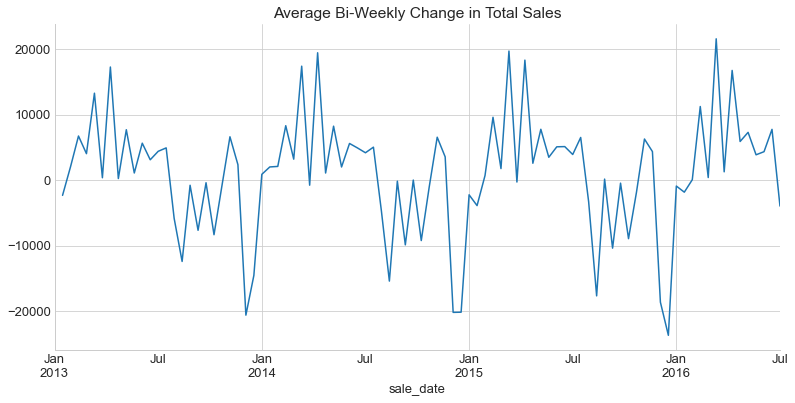

In [65]:
sales_total.resample('2W').mean().diff().plot(title='Average Bi-Weekly Change in Total Sales');


<AxesSubplot:title={'center':'Seasonal Plots'}, xlabel='sale_date'>

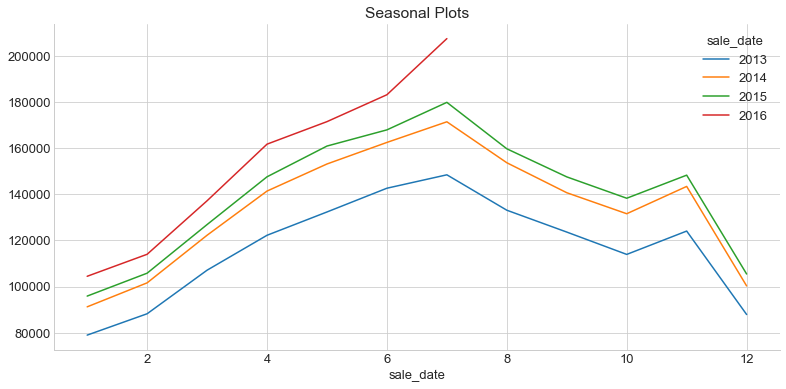

In [68]:
#Seasonal Plot
sales_total.groupby([sales_total.index.year, sales_total.index.month]).mean().unstack(0).plot(title='Seasonal Plots')

In [ ]:
#Seasonal Subseries Plot


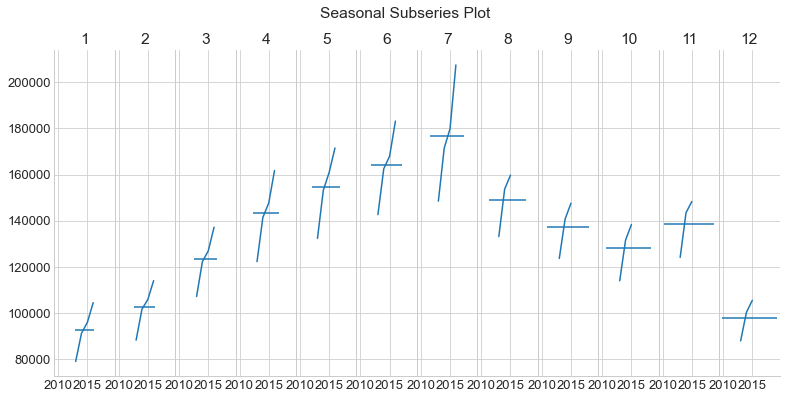

In [71]:
table = sales_total.groupby([sales_total.index.year, sales_total.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

In [73]:
#changing my variable to what's pulled from class code
y = sales_total

Text(0.5, 1.0, 'Lag plot with lag = 1')

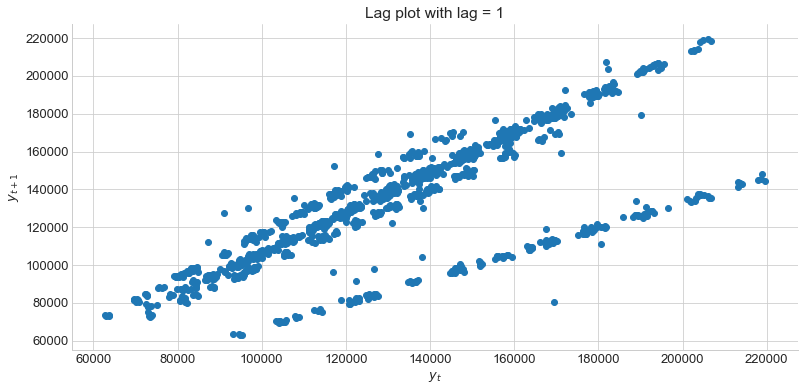

In [74]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

Text(0.5, 1.0, 'Lag plot with t + 1')

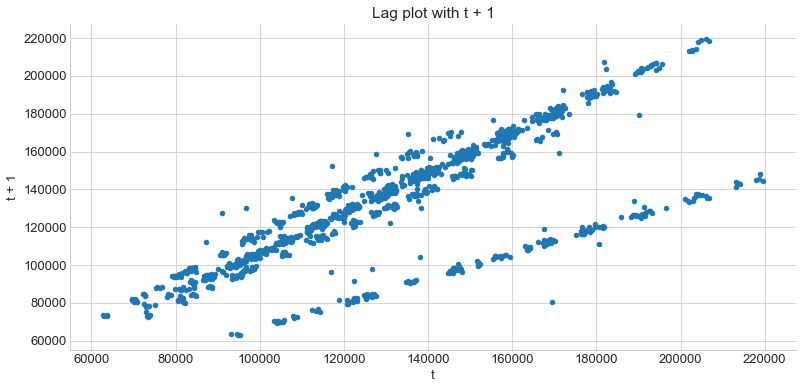

In [76]:
#pulled this - need to understand better
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')
plt.title('Lag plot with t + 1')

,this_week,month,y(t + 1),1_weeks_out
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,1.000000,80116.838333,79990.601429
2013-01-13 00:00:00+00:00,79990.601429,1.000000,79884.427143,78973.360000
2013-01-20 00:00:00+00:00,78973.360000,1.000000,78938.260000,79272.691429
2013-01-27 00:00:00+00:00,79272.691429,1.000000,79398.127143,83792.507143
2013-02-03 00:00:00+00:00,83792.507143,1.428571,84716.047143,88227.801429


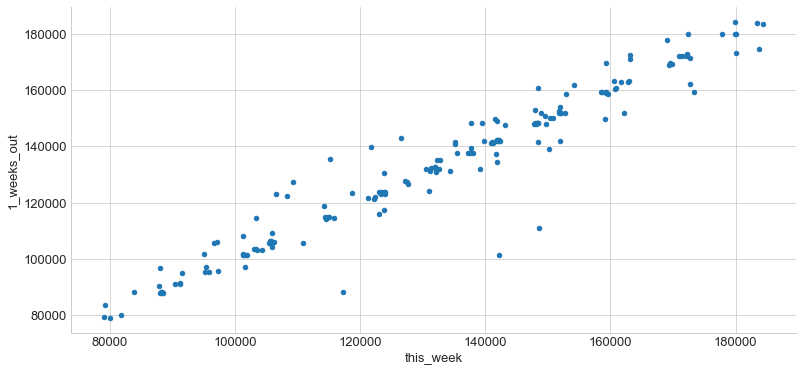

In [79]:
weekly = train.resample('W').mean()
weekly['1_weeks_out'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='1_weeks_out')
weekly.head()

<AxesSubplot:xlabel='this_week', ylabel='half_a_year_later'>

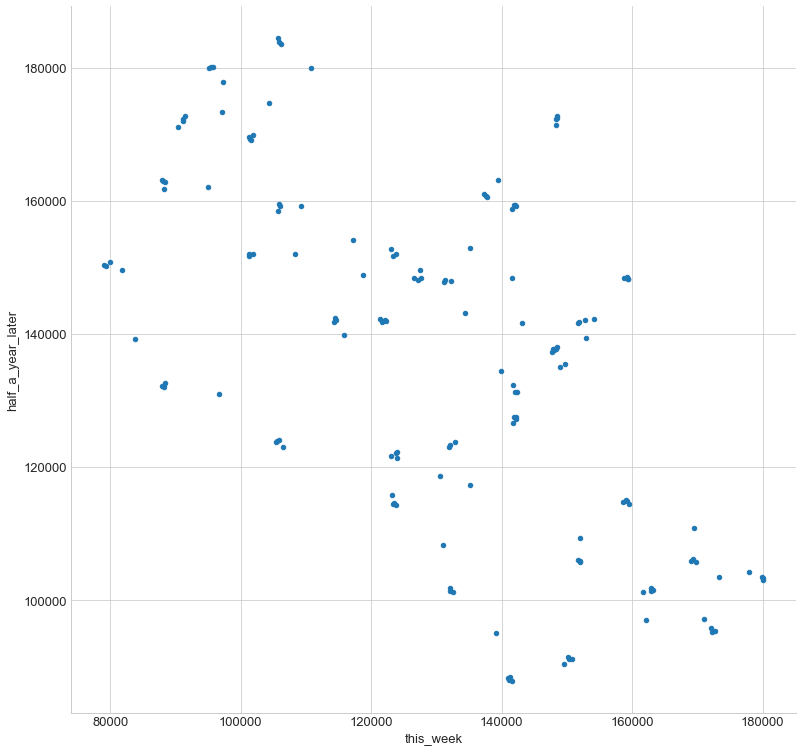

In [80]:
#push it back 6 months - doesn't tell us much

weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))

In [ ]:
#Autocorrelation: Autocorrelation is a measure of the linear relationship between lagged values of a time series. 
#An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

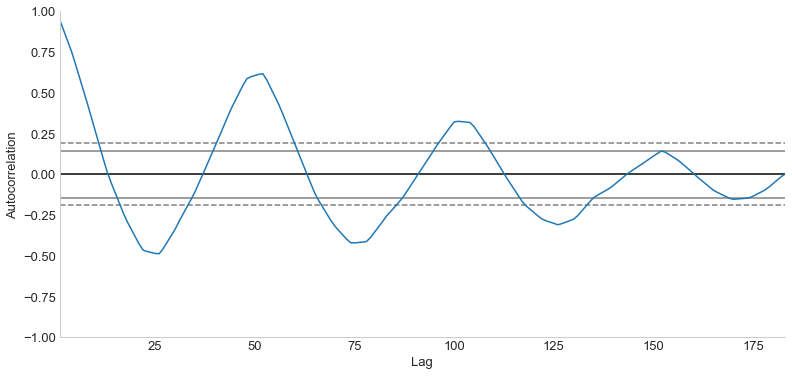

In [85]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [92]:
import statsmodels.api as sm


# seasonal decomposition
y = train.sales_total.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)


In [93]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38901.876390,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38210.382887,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38830.973862,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38827.078436,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36538.820195,NaN


<AxesSubplot:xlabel='sale_date'>

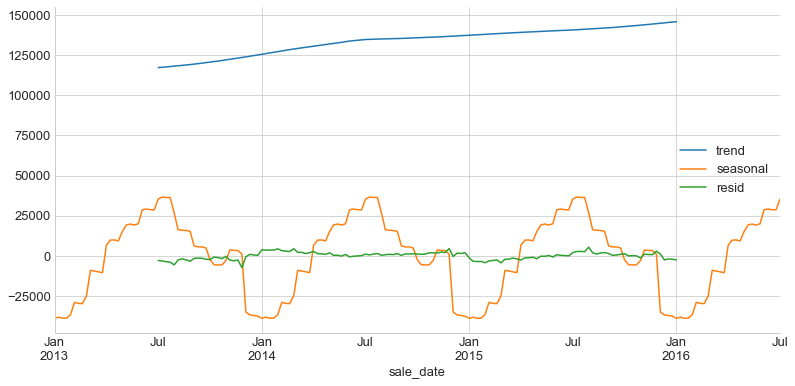

In [94]:
decomposition.iloc[:, 1:].plot()


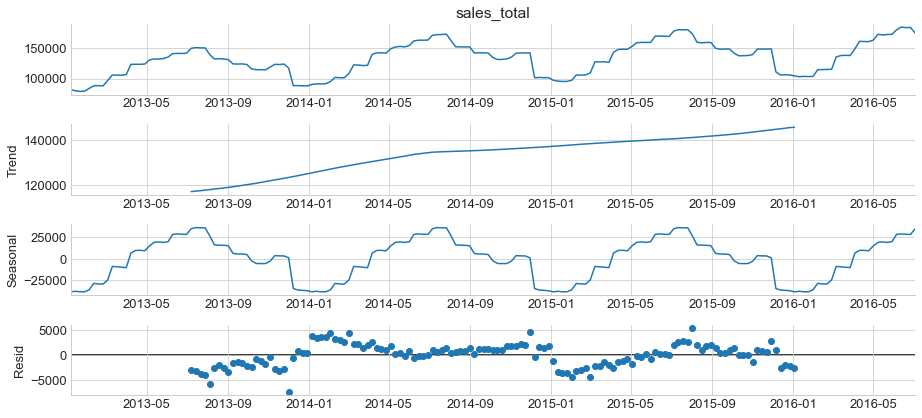

In [95]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [ ]:
# Categories over timne

# OPSD